![]( https://docs.google.com/uc?export=download&id=1oKIi5t0GlSKAoPTIt1f-DcOu0GcYHDD4)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/flask-sqlite-login")
!pwd
!ls

/content/drive/My Drive/flask-sqlite-login
 Data_Generate_Reg_Eun_30.csv
 dataset_dump.csv
 fga_big_data_Eunice.db
 indexzz.html
'Memasukkan data usulan ke db_Eunice Cristine.ipynb'
 Sesi_17_Flask_x_Google_Colab_Part1of2_CSV_to_SQLite3.ipynb
 Sesi_17_Flask_x_Google_Colab_Part2of2.ipynb
 static
 templates


In [ ]:
!pip install flask-ngrok
!pip install flask==0.12.2  # Newer versions of flask don't work in Colab
                            # See https://github.com/plotly/dash/issues/257

In [ ]:
# !pip install flask
!pip install SQLAlchemy
!pip install Flask-SQLAlchemy

In [ ]:
!pip install flask-login

In [ ]:
!sudo pip install flask-wtf

In [ ]:
pip install email_validator

In [7]:
from flask import Flask
from flask_ngrok import run_with_ngrok

In [ ]:
# ========================================================

In [57]:
# flask_ngrok_example.py
from flask import Flask,render_template,flash, redirect,url_for,session,logging,request
from flask_sqlalchemy import SQLAlchemy
from flask_ngrok import run_with_ngrok

# !pip install SQLAlchemy
# !pip install Flask-SQLAlchemy

# app = Flask(__name__)
# app = Flask(__name__, static_url_path='/static')
app = Flask(__name__, static_folder='static')
run_with_ngrok(app)  # Start ngrok when app is run

# app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:////fga_big_data_Eunice.db'
db = SQLAlchemy(app)

class user(db.Model):
  #__tablename__ = 'users'
  id = db.Column(db.Integer, primary_key=True)
  # Mail 	Password 	Name 	Level
  Mail = db.Column(db.Text) # sbg Username
  Password = db.Column(db.Text)
  Name = db.Column(db.Text)
  Level = db.Column(db.Text)

  # username = Mail
  # password = Password

@app.route("/")
def index():
    session['tmp'] = 43
    return render_template("index.html")

@app.route("/login",methods=["GET", "POST"])
def login():
    msg = ""
    if request.method == "POST":
        mail = request.form["mail"]
        passw = request.form["passw"]
        
        login = user.query.filter_by(Mail=mail, Password=passw).first()
        print(login)
        if login is not None:
            # return redirect(url_for("index"))
            # return redirect(url_for("bigdataApps"))
            return render_template('bigdataApps.html', login = login)
        elif login is None:
            msg = "Masukkan Username (Email) dan Password dgn Benar"
            print(msg)

    return render_template("login.html", msg = msg)

@app.route("/register", methods=["GET", "POST"])
def register():
    if request.method == "POST":
        mail = request.form['mail']
        uname = request.form['uname']
        passw = request.form['passw']

        register = user(Mail = mail, Name = uname, Password = passw)
        # register = user(Mail = mail, Password = passw)
        db.session.add(register)
        db.session.commit()

        return redirect(url_for("login"))
    return render_template("register.html")

@app.route('/signout')
def sign_out():
    session.pop('tmp')
    return redirect(url_for("index"))

@app.route("/bigdataApps", methods=["GET", "POST"])
def bigdataApps():
  # return "Hello FGA Big Data Using Python!" 
	if request.method == 'POST':
		import pandas as pd
		import numpy as np
		dataset = request.FILES['inputDataset']
    # dataset = request.files['inputDataset']
     
		persentase_data_training = 90
		banyak_fitur = int(request.POST['banyakFitur'])
		banyak_hidden_neuron = int(request.POST['banyakHiddenNeuron'])

		dataset = pd.read_csv(dataset, delimiter=';', names = ['Tanggal', 'Harga'], usecols=['Harga'])
		minimum = int(dataset.min()-10000)
		maksimum = int(dataset.max()+10000)
		new_banyak_fitur = banyak_fitur + 1
		hasil_fitur = []
		for i in range((len(dataset)-new_banyak_fitur)+1):
			kolom = []
			j = i
			while j < (i+new_banyak_fitur):
				kolom.append(dataset.values[j][0])
				j += 1
			hasil_fitur.append(kolom)
		hasil_fitur = np.array(hasil_fitur)
		data_normalisasi = (hasil_fitur - minimum)/(maksimum - minimum)

		data_training = data_normalisasi[:int(persentase_data_training*len(data_normalisasi)/100)]
		data_testing = data_normalisasi[int(persentase_data_training*len(data_normalisasi)/100):]

		#Training
		bobot = np.random.rand(banyak_hidden_neuron, banyak_fitur)
		bias = np.random.rand(banyak_hidden_neuron)
		h = 1/(1 + np.exp(-(np.dot(data_training[:, :banyak_fitur], np.transpose(bobot)) + bias)))
		h_plus = np.dot(np.linalg.inv(np.dot(np.transpose(h),h)),np.transpose(h))
		output_weight = np.dot(h_plus, data_training[:, banyak_fitur])

		#Testing
		h = 1/(1 + np.exp(-(np.dot(data_testing[:, :banyak_fitur], np.transpose(bobot)) + bias)))
		predict = np.dot(h, output_weight)
		predict = predict * (maksimum - minimum) + minimum

		#MAPE
		aktual = np.array(hasil_fitur[int(persentase_data_training*len(data_normalisasi)/100):, banyak_fitur])
		mape = np.sum(np.abs(((aktual - predict)/aktual)*100))/len(predict)
		return render_template('bigdataApps.html', {
		'y_aktual' : list(aktual),
		'y_prediksi' : list(predict),
		'mape' : mape
	})
	else:
		return render_template('bigdataApps.html')

if __name__ == '__main__':
  db.create_all()
  app.secret_key = 'A0Zr98j/3yX R~XHH!jmN]LWX/,?Rz'
  app.run()  # If address is in use, may need to terminate other sessions:
             # Runtime > Manage Sessions > Terminate Other Sessions

/usr/local/lib/python3.7/dist-packages/flask_sqlalchemy/__init__.py:873: FSADeprecationWarning: SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and will be disabled by default in the future.  Set it to True or False to suppress this warning.
  'SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and '
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://deae9e51ec67.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [08/Aug/2021 13:44:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:44:09] "GET /static/css/style2.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:44:10] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [08/Aug/2021 13:44:10] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:44:12] "GET /static/css/style2.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:44:43] "GET /register HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:44:44] "GET /static/css/style4.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:44:45] "GET /register HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:44:46] "GET /static/css/style4.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:05] "GET /login HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:07] "GET /login HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:08] "GET /static/css/style4.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:43] "POST /login HTTP/1.1" 200 -


<user 2>


127.0.0.1 - - [08/Aug/2021 13:45:44] "GET /static/css/chartist-plugin-tooltip.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:44] "GET /static/css/bootstrap.min.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:44] "GET /static/css/chartist.min.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:44] "GET /static/css/morris.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:44] "GET /static/css/sidebar-nav.min.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:44] "GET /static/css/jquery.toast.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:44] "GET /static/css/fullcalendar.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:44] "GET /static/css/animate.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:44] "GET /static/css/style.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:45] "GET /static/css/spinners.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:45] "GET /static/css/blue-dark.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 13:45:45] "GET /static/js/

In [ ]:
!pip install Jinja2

In [ ]:
!pip freeze

In [ ]:
%%file ./templates/include/script.html
<!-- Jquery JavaScript -->
<script type="text/javascript" src="{{ url_for('static', filename = 'js/jquery.min.js') }}"></script>
<!-- Jquery JavaScript -->
<script type="text/javascript" src="{{ url_for('static', filename = 'js/jquery.sparkline.min.js') }}"></script>
<script type="text/javascript" src="{{ url_for('static', filename = 'js/script.js') }}"></script>
<!-- Bootstrap Core JavaScript -->
<script type="text/javascript" src="{{ url_for('static', filename = 'js/bootstrap.min.js') }}"></script>
<!-- Menu Plugin JavaScript -->
<script type="text/javascript" src="{{ url_for('static', filename = 'js/sidebar-nav.min.js') }}"></script>
<!--slimscroll JavaScript -->
<script type="text/javascript" src="{{ url_for('static', filename = 'js/jquery.slimscroll.js') }}"></script>
<!--Wave Effects -->
<script type="text/javascript" src="{{ url_for('static', filename = 'js/waves.js') }}"></script>
<!--Morris JavaScript -->
<script type="text/javascript" src="{{ url_for('static', filename = 'js/raphael-min.js') }}"></script>
<script type="text/javascript" src="{{ url_for('static', filename = 'js/morris.js') }}"></script>
<!-- chartist chart -->
<script type="text/javascript" src="{{ url_for('static', filename = 'js/chartist.min.js') }}"></script>
<script type="text/javascript" src="{{ url_for('static', filename = 'js/chartist-plugin-tooltip.min.js') }}"></script>
<!-- Calendar JavaScript -->
<script type="text/javascript" src="{{ url_for('static', filename = 'js/moment.js') }}"></script>
<script type="text/javascript" src="{{ url_for('static', filename = 'js/fullcalendar.min.js') }}"></script>
<script type="text/javascript" src="{{ url_for('static', filename = 'js/cal-init.js') }}"></script>
<!-- Custom Theme JavaScript -->
<script type="text/javascript" src="{{ url_for('static', filename = 'js/custom.min.js') }}"></script>
<script type="text/javascript" src="{{ url_for('static', filename = 'js/dashboard1.js') }}"></script>
<!-- Custom tab JavaScript -->
<script type="text/javascript" src="{{ url_for('static', filename = 'js/cbpFWTabs.js') }}"></script>
<script type="text/javascript" >
(function() {
    [].slice.call(document.querySelectorAll('.sttabs')).forEach(function(el) {
        new CBPFWTabs(el);
    });
})();
</script>
<!-- Toast JavaScript -->
<script type="text/javascript" src="{{ url_for('static', filename = 'js/jquery.toast.js') }}"></script>
<!--Style Switcher -->
<script type="text/javascript" src="{{ url_for('static', filename = 'js/jQuery.style.switcher.js') }}"></script>
<!--File Upload -->
<script type="text/javascript" src="{{ url_for('static', filename = 'js/jasny-bootstrap.js') }}"></script>
<script type="text/javascript" src="{{ url_for('static', filename = 'js/highcharts.js') }}"></script>
<script>
Highcharts.chart('hasilGrafik', {
    chart: {
        type: 'spline'
    },
    
    title: {
        text: 'Prediksi Harga Kebutuhan Pokok'
    },

    xAxis: {
        title: {
            text: 'Data ke-'
        }
    },

    yAxis: {
        title: {
            text: 'Harga (Rupiah)'
        }
    },

    legend: {
        layout: 'vertical',
        align: 'right',
        verticalAlign: 'middle'
    },

    plotOptions: {
        series: {
            label: {
                connectorAllowed: false
            }
        }
    },

    series: [{
        name: 'Y Aktual',
        data:  {{ y_aktual }}
    }, {
        name: 'Y Prediksi',
        data: {{ y_prediksi }}
    }],

    responsive: {
        rules: [{
            condition: {
                maxWidth: 500
            },
            chartOptions: {
                legend: {
                    layout: 'horizontal',
                    align: 'center',
                    verticalAlign: 'bottom'
                }
            }
        }]
    }

});
</script>

Overwriting ./templates/include/script.html


In [52]:
%%file ./templates/include/left_sidebar.html
<div class="navbar-default sidebar" role="navigation">
    <div class="sidebar-nav slimscrollsidebar">
        <div class="sidebar-head">
            <h3><span class="fa-fw open-close"><i class="ti-menu hidden-xs"></i><i class="ti-close visible-xs"></i></span> <span class="hide-menu">Menu</span></h3> </div>
        <ul class="nav" id="side-menu">
            <li class="user-pro">
                <a href="#" class="waves-effect"><img src="{{ url_for('static', filename = 'img/guest.png') }}" alt="user-img" class="img-circle"> <span class="hide-menu">{{login.Name}}<span class="fa arrow"></span></span>
                </a>
                <ul class="nav nav-second-level collapse" aria-expanded="false" style="height: 0px;">
                    <li><a href="javascript:void(0)"><i class="ti-user"></i> <span class="hide-menu">My Profile</span></a></li>
                    <li><a href="javascript:void(0)"><i class="fa fa-power-off"></i> <span class="hide-menu">Logout</span></a></li>
                </ul>
            </li>
            <li class="devider"></li>
            <li> <a href="week1" class="waves-effect"><i class="mdi mdi-numeric-1-box-multiple-outline fa-fw"></i><span class="hide-menu">Week 1</span></a> </li>
            <li> <a href="week21" class="waves-effect"><i class="mdi mdi-numeric-2-box-multiple-outline fa-fw" data-icon="v"></i> <span class="hide-menu"> Week 2 <span class="fa arrow"></span> <span class="label label-rouded label-inverse pull-right">2</span></span></a>
                <ul class="nav nav-second-level">
                    <li> <a href="week21"><i class=" fa-fw">1</i><span class="hide-menu">Task 1</span></a> </li>
                    <li> <a href="week22"><i class=" fa-fw">2</i><span class="hide-menu">Task 2</span></a> </li>
                </ul>
            </li>
            <li> <a href="week3" class="waves-effect"><i class="mdi mdi-numeric-3-box-multiple-outline fa-fw"></i><span class="hide-menu">Week 3</span></a> </li>
            <li> <a href="week4" class="waves-effect"><i class="mdi mdi-numeric-4-box-multiple-outline fa-fw"></i><span class="hide-menu">Week 4</span></a> </li>
            <li> <a href="week5" class="waves-effect"><i class="mdi mdi-numeric-5-box-multiple-outline fa-fw"></i><span class="hide-menu">Week 5</span></a> </li>
            <li> <a href="week6" class="waves-effect"><i class="mdi mdi-numeric-6-box-multiple-outline fa-fw"></i><span class="hide-menu">Week 6</span></a> </li>
            <li> <a href="week7" class="waves-effect"><i class="mdi mdi-numeric-7-box-multiple-outline fa-fw"></i><span class="hide-menu">Week 7</span></a> </li>
            <li> <a href="week8" class="waves-effect"><i class="mdi mdi-numeric-8-box-multiple-outline fa-fw"></i><span class="hide-menu">Week 8</span></a> </li>
        </ul>
    </div>
</div>

Overwriting ./templates/include/left_sidebar.html


In [53]:
%%file ./templates/include/top_header.html
<nav class="navbar navbar-default navbar-static-top m-b-0">
    <div class="navbar-header">
        <div class="top-left-part">
            <a class="logo" href="index.html">
                <b>
                    <img src="{{ url_for('static', filename = 'img/ub.png') }}" alt="home" class="dark-logo" />
                </b>
                <span class="hidden-xs">
                    <img src="{{ url_for('static', filename = 'img/filkom1.png') }}" alt="home" class="dark-logo" />
                </span> 
            </a>
        </div>
        <!-- Search input and Toggle icon -->
        <ul class="nav navbar-top-links navbar-left">
            <li><a href="javascript:void(0)" class="open-close waves-effect waves-light visible-xs"><i class="ti-close ti-menu"></i></a></li>
            <li class="dropdown">
                <a class="dropdown-toggle waves-effect waves-light" data-toggle="dropdown" href="#"> <i class="mdi mdi-gmail"></i>
                    <div class="notify"> <span class="heartbit"></span> <span class="point"></span> </div>
                </a>
                <ul class="dropdown-menu mailbox animated bounceInDown">
                    <li>
                        <div class="drop-title">You have 4 new messages</div>
                    </li>
                    <li>
                        <div class="message-center">
                            <a href="#">
                                <div class="user-img"> <img src="../plugins/images/users/pawandeep.jpg" alt="user" class="img-circle"> <span class="profile-status online pull-right"></span> </div>
                                <div class="mail-contnet">
                                    <h5>Pavan kumar</h5> <span class="mail-desc">Just see the my admin!</span> <span class="time">9:30 AM</span> </div>
                            </a>
                            <a href="#">
                                <div class="user-img"> <img src="../plugins/images/users/sonu.jpg" alt="user" class="img-circle"> <span class="profile-status busy pull-right"></span> </div>
                                <div class="mail-contnet">
                                    <h5>Sonu Nigam</h5> <span class="mail-desc">I've sung a song! See you at</span> <span class="time">9:10 AM</span> </div>
                            </a>
                            <a href="#">
                                <div class="user-img"> <img src="../plugins/images/users/arijit.jpg" alt="user" class="img-circle"> <span class="profile-status away pull-right"></span> </div>
                                <div class="mail-contnet">
                                    <h5>Arijit Sinh</h5> <span class="mail-desc">I am a singer!</span> <span class="time">9:08 AM</span> </div>
                            </a>
                            <a href="#">
                                <div class="user-img"> <img src="../plugins/images/users/pawandeep.jpg" alt="user" class="img-circle"> <span class="profile-status offline pull-right"></span> </div>
                                <div class="mail-contnet">
                                    <h5>Pavan kumar</h5> <span class="mail-desc">Just see the my admin!</span> <span class="time">9:02 AM</span> </div>
                            </a>
                        </div>
                    </li>
                    <li>
                        <a class="text-center" href="javascript:void(0);"> <strong>See all notifications</strong> <i class="fa fa-angle-right"></i> </a>
                    </li>
                </ul>
            </li>
            <!-- .Task dropdown -->
            <li class="dropdown">
                <a class="dropdown-toggle waves-effect waves-light" data-toggle="dropdown" href="#"> <i class="mdi mdi-check-circle"></i>
                    <div class="notify"><span class="heartbit"></span><span class="point"></span></div>
                </a>
                <ul class="dropdown-menu dropdown-tasks animated slideInUp">
                    <li>
                        <a href="#">
                            <div>
                                <p> <strong>Task 1</strong> <span class="pull-right text-muted">40% Complete</span> </p>
                                <div class="progress progress-striped active">
                                    <div class="progress-bar progress-bar-success" role="progressbar" aria-valuenow="40" aria-valuemin="0" aria-valuemax="100" style="width: 40%"> <span class="sr-only">40% Complete (success)</span> </div>
                                </div>
                            </div>
                        </a>
                    </li>
                    <li class="divider"></li>
                    <li>
                        <a href="#">
                            <div>
                                <p> <strong>Task 2</strong> <span class="pull-right text-muted">20% Complete</span> </p>
                                <div class="progress progress-striped active">
                                    <div class="progress-bar progress-bar-info" role="progressbar" aria-valuenow="20" aria-valuemin="0" aria-valuemax="100" style="width: 20%"> <span class="sr-only">20% Complete</span> </div>
                                </div>
                            </div>
                        </a>
                    </li>
                    <li class="divider"></li>
                    <li>
                        <a href="#">
                            <div>
                                <p> <strong>Task 3</strong> <span class="pull-right text-muted">60% Complete</span> </p>
                                <div class="progress progress-striped active">
                                    <div class="progress-bar progress-bar-warning" role="progressbar" aria-valuenow="60" aria-valuemin="0" aria-valuemax="100" style="width: 60%"> <span class="sr-only">60% Complete (warning)</span> </div>
                                </div>
                            </div>
                        </a>
                    </li>
                    <li class="divider"></li>
                    <li>
                        <a href="#">
                            <div>
                                <p> <strong>Task 4</strong> <span class="pull-right text-muted">80% Complete</span> </p>
                                <div class="progress progress-striped active">
                                    <div class="progress-bar progress-bar-danger" role="progressbar" aria-valuenow="80" aria-valuemin="0" aria-valuemax="100" style="width: 80%"> <span class="sr-only">80% Complete (danger)</span> </div>
                                </div>
                            </div>
                        </a>
                    </li>
                    <li class="divider"></li>
                    <li>
                        <a class="text-center" href="#"> <strong>See All Tasks</strong> <i class="fa fa-angle-right"></i> </a>
                    </li>
                </ul>
            </li>
        </ul>
        <ul class="nav navbar-top-links navbar-right pull-right">
            <li>
                <form role="search" class="app-search hidden-sm hidden-xs m-r-10">
                    <input type="text" placeholder="Search..." class="form-control"> <a href=""><i class="fa fa-search"></i></a> </form>
            </li>
            <li class="dropdown">
                <a class="dropdown-toggle profile-pic" data-toggle="dropdown" href="#"> <img src="{{ url_for('static', filename = 'img/guest.png') }}" alt="user-img" width="36" class="img-circle"><b class="hidden-xs">{{login.Name}}</b><span class="caret"></span> </a>
                <ul class="dropdown-menu dropdown-user animated flipInY">
                    <li>
                        <div class="dw-user-box">
                            <div class="u-img"><img src="{{ url_for('static', filename = 'img/guest.png') }}" alt="user" /></div>
                            <div class="u-text">
                                <h4>{{login.Name}}</h4>
                                <p class="text-muted">{{login.Mail}}</p><a href="profile.html" class="btn btn-rounded btn-danger btn-sm">View Profile</a></div>
                        </div>
                    </li>
                    <li role="separator" class="divider"></li>
                    <li><a href="#"><i class="ti-user"></i> My Profile</a></li>
                    <li><a href="/signout"><i class="fa fa-power-off"></i> Logout</a></li>
                </ul>
            </li>
        </ul>
    </div>
</nav>

Overwriting ./templates/include/top_header.html


In [ ]:
%%file ./templates/include/link.html
<link rel="shortcut icon" href="https://filkom.ub.ac.id/assets/icons/xfavicon-32x32.png.pagespeed.ic.aoSXDJiknB.webp" type="image/x-icon"/>
<!-- Bootstrap Core CSS -->
<link rel="stylesheet" type="text/css" href="{{ url_for('static', filename = 'css/bootstrap.min.css') }}" />
<!-- Menu CSS -->
<link rel="stylesheet" type="text/css" href="{{ url_for('static', filename = 'css/sidebar-nav.min.css') }}" />
<!-- toast CSS -->
<link rel="stylesheet" type="text/css" href="{{ url_for('static', filename = 'css/jquery.toast.css') }}" />
<!-- morris CSS -->
<link rel="stylesheet" type="text/css" href="{{ url_for('static', filename = 'css/morris.css') }}" />
<!-- chartist CSS -->
<link rel="stylesheet" type="text/css" href="{{ url_for('static', filename = 'css/chartist.min.css') }}" />
<link rel="stylesheet" type="text/css" href="{{ url_for('static', filename = 'css/chartist-plugin-tooltip.css') }}" />
<!-- Calendar CSS -->
<link rel="stylesheet" type="text/css" href="{{ url_for('static', filename = 'css/fullcalendar.css') }}" />
<!-- animation CSS -->
<link rel="stylesheet" type="text/css" href="{{ url_for('static', filename = 'css/animate.css') }}" />
<!-- Custom CSS -->
<link rel="stylesheet" type="text/css" href="{{ url_for('static', filename = 'css/style.css') }}" />
<!-- Spinner CSS -->
<link rel="stylesheet" type="text/css" href="{{ url_for('static', filename = 'css/spinners.css') }}" />
<!-- color CSS -->
<link rel="stylesheet" type="text/css" href="{{ url_for('static', filename = 'css/blue-dark.css') }}" id="theme" />

Overwriting ./templates/include/link.html


In [ ]:
%%file ./templates/extends/base.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta http-equiv="X-UA-Compatible" content="ie=edge">
    <meta name="description" content="">
    <meta name="author" content="">
    {% block title %}{% endblock title %}
    {% include "include/link.html" %}
</head>
<body>
    {% include "include/preloader.html" %}
    <div id="wrapper">
        {% include "include/top_header.html" %}
        {% include "include/left_sidebar.html" %}
        <!-- ============================================================== -->
        <!-- Page Content -->
        <!-- ============================================================== -->
        <div id="page-wrapper">
            <div class="container-fluid">
                <div class="row bg-title">
                    <div class="col-lg-3 col-md-4 col-sm-4 col-xs-12">
                        <h4 class="page-title">{{ self.title() }}</h4>
                    </div>
                    <div class="col-lg-9 col-sm-8 col-md-8 col-xs-12">
                       <ol class="breadcrumb">
                            <li><a href="#">{{ self.title() }}</a></li>
                            <li class="active">{{ self.title() }}</li>
                        </ol>
                    </div>
                </div>
                {% block content %}{% endblock content %}
            </div>
            <!-- /.container-fluid -->
            {% include "include/footer.html" %}
        </div>
        <!-- ============================================================== -->
        <!-- End Page Content -->
        <!-- ============================================================== -->
    </div>
</body>
{% include "include/script.html" %}
</html>

Overwriting ./templates/extends/base.html


In [ ]:
%%file ./templates/bigdataApps.html
{% extends "extends/base.html" %}
{% block title %}
    <title>FGA Big Data Using Python</title>
{% endblock title %}
{{ self.title() }}
    Home
{{ self.title() }}
<button onclick="window.location.href='/'" class="btn btn-outline btn-rounded btn-info">
    <i class="ti-arrow-left m-l-5"></i>
    <span>Back Home</span>
</button> Week 1

{{ self.title() }}
    Week 1

{% block content %}

<div class="row" onload="myfunction()">
    <div class="col-md-3"></div>
    <div class="col-md-6">
        <div class="white-box">
            <div class="row">
                <h3 class="box-title m-b-0">Input Parameter</h3>
                <p class="text-muted m-b-30 font-13"> Prediksi Harga Kebutuhan Pokok Menggunakan Algoritme <i>Extreme Learning Machine</i> </p>
                <form class="form-horizontal" action="bigdataApps" method="POST" enctype="multipart/form-data">
                    <input type="hidden" name="csrfmiddlewaretoken" value="{{ csrf_token }}">
                    <div class="form-group">
                        <label class="col-sm-12">Upload File Dataset <sub>.csv</sub></label>
                        <div class="col-sm-12">
                            <div class="fileinput fileinput-new input-group" data-provides="fileinput">
                                <div class="form-control" data-trigger="fileinput"> <i class="glyphicon glyphicon-file fileinput-exists"></i> <span class="fileinput-filename"></span></div> <span class="input-group-addon btn btn-default btn-file"> <span class="fileinput-new">Select file</span> <span class="fileinput-exists">Change</span>
                                <input type="file" name="inputDataset"> </span> <a href="#" class="input-group-addon btn btn-default fileinput-exists" data-dismiss="fileinput">Remove</a> </div>
                        </div>
                    </div>
                    <div class="form-group">
                        <label class="col-sm-12">Banyak Fitur</label>
                        <div class="col-sm-12">
                            <select class="form-control" name="banyakFitur" id="banyak_fitur">
                                <option selected>Pilih Banyak Fitur</option>
                                <option value="2">2</option>
                                <option value="3">3</option>
                                <option value="4">4</option>
                                <option value="5">5</option>
                                <option value="6">6</option>
                                <option value="7">7</option>
                                <option value="8">8</option>
                            </select>
                        </div>
                    </div>
                    <div class="form-group">
                        <label class="col-sm-12">Banyak <i>Hidden Neuron</i></label>
                        <div class="col-sm-12">
                            <select class="form-control" name="banyakHiddenNeuron" id="banyak_hidden_neuron">
                                <option selected>Pilih Banyak <i>Hidden Neuron</i></option>
                                <option value="2">2</option>
                                <option value="3">3</option>
                                <option value="4">4</option>
                                <option value="5">5</option>
                                <option value="6">6</option>
                                <option value="7">7</option>
                                <option value="8">8</option>
                            </select>
                        </div>
                    </div>
                    <button id="submit" class="btn btn-block btn-info btn-rounded">Proses</button>
                    </div>
                </form>
            </div>
        </div>
    </div>
    <div class="col-md-3"></div>
    <div class="panel panel-info block4">
        <div class="panel-heading"> Detail Hasil Prediksi
            <div class="pull-right"><a href="#" data-perform="panel-collapse"><i class="ti-minus"></i></a> <a href="#" data-perform="panel-dismiss"><i class="ti-close"></i></a> </div>
        </div>
        <div class="panel-wrapper collapse in" aria-expanded="true">
            <div class="panel-body">
                <div class="row">
                    <div class="col-md-2">
                        <div class="table-responsive">
                            <table class="table table-hover" data-height="10">
                                <thead>
                                    <tr>
                                    <th scope="col">Data ke-</th>
                                    <th scope="col">Nilai Aktual</th>
                                    </tr>
                                </thead>
                                <tbody>
                                    {% for aktual in y_aktual %}
                                        <tr>
                                            <th scope="row" >{{ forloop.counter0 }}</th>
                                            <td>{{'%0.2f'|format(aktual|float)}}</td>
                                        </tr>
                                    {% endfor %}
                                </tbody>
                            </table>
                        </div>
                    </div>
                    <div class="col-md-2">
                        <div class="table-responsive">
                            <table class="table table-hover" data-height="10">
                                <thead>
                                    <tr>
                                    <th scope="col">Nilai Prediksi</th>
                                    </tr>
                                </thead>
                                <tbody>
                                    {% for prediksi in y_prediksi %}
                                        <tr>
                                            <td>{{'%0.2f'|format(prediksi|float)}}</td>
                                        </tr>
                                    {% endfor %}
                                </tbody>
                            </table>
                        </div>
                    </div>
                    <div class="col-md-8">
                        <div class="form-group">
                            <div class="row">
                                <label class="col-md-3" for="example-email"><h2>Nilai MAPE</h2></label>
                                <div class="col-md-9">
                                    <input value="{{mape}}" type="email" id="example-email" name="example-email" class="form-control" placeholder="Nilai MAPE" readonly>
                                </div>
                            </div>
                        </div>
                        <div class="table-responsive border tableFixHead" style="height:470px" id="hasilGrafik"></div>
                    </div>
                </div>
            </div>
        </div>
    </div>
</div>
{% endblock content %}

Overwriting ./templates/bigdataApps.html


In [ ]:
%%file ./templates/register.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta http-equiv="X-UA-Compatible" content="ie=edge">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/meyer-reset/2.0/reset.min.css">
    <title>Register | Flask</title>
    <!-- Latest compiled and minified CSS -->
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous">

    <!-- Optional theme -->
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap-theme.min.css" integrity="sha384-rHyoN1iRsVXV4nD0JutlnGaslCJuC7uwjduW9SVrLvRYooPp2bWYgmgJQIXwl/Sp" crossorigin="anonymous">
</head>
<body>
    <div class="container">
        <div class="row" style="margin-top: 40px">
            <div class="col-sm-6">
                <form method="POST">                    
                    <div class="form-group">
                      <label for="email">Username (Email) : </label>
                      <input type="email" name="mail" class="form-control" id="mail">
                    </div>
                    <div class="form-group">
                      <label for="email">Name : </label>
                      <input type="text" name="uname" class="form-control" id="uname">
                    </div>
                    <div class="form-group">
                      <label for="email">Password : </label>
                      <input type="password" name="passw" class="form-control" id="passw">
                    </div>
                    <button type="submit" class="btn form-control btn-default">Register</button>
                </form>
            </div>
        </div>
    </div>


<!-- Latest compiled and minified JavaScript -->
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js" integrity="sha384-Tc5IQib027qvyjSMfHjOMaLkfuWVxZxUPnCJA7l2mCWNIpG9mGCD8wGNIcPD7Txa" crossorigin="anonymous"></script>
</body>
</html>

Overwriting ./templates/register.html


In [ ]:
%%file ./templates/login.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta http-equiv="X-UA-Compatible" content="ie=edge">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/meyer-reset/2.0/reset.min.css">
    <title>Login | Flask</title>
    <!-- Latest compiled and minified CSS -->
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous">

    <!-- Optional theme -->
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap-theme.min.css" integrity="sha384-rHyoN1iRsVXV4nD0JutlnGaslCJuC7uwjduW9SVrLvRYooPp2bWYgmgJQIXwl/Sp" crossorigin="anonymous">
</head>
<body>
    <div class="container">
        <div class="white-box" style="margin-top: 60px">
            <div class="col-sm-6">
                <form method="POST">
                    <div class="form-group">
                      <label for="email">Username (Email) : </label>
                      <input type="text" name="mail" class="form-control" id="mail">
                    </div>
                    <div class="form-group">
                      <label for="email">Password : </label>
                      <input type="password" name="passw" class="form-control" id="passw">
                    </div>
                    <button type="submit" class="btn form-control btn-default">Login</button>
                </form>
            </div>
        </div>
    </div>


<!-- Latest compiled and minified JavaScript -->
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js" integrity="sha384-Tc5IQib027qvyjSMfHjOMaLkfuWVxZxUPnCJA7l2mCWNIpG9mGCD8wGNIcPD7Txa" crossorigin="anonymous"></script>
</body>
</html>

Overwriting ./templates/login.html


In [ ]:
%%file ./templates/index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta http-equiv="X-UA-Compatible" content="ie=edge">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/meyer-reset/2.0/reset.min.css">
    <title>Login - Register Form | Flask</title>
    <!-- Latest compiled and minified CSS -->
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous">
    <link rel="stylesheet" type="text/css" href="static/css/style.css">
    <!-- Optional theme -->
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap-theme.min.css" integrity="sha384-rHyoN1iRsVXV4nD0JutlnGaslCJuC7uwjduW9SVrLvRYooPp2bWYgmgJQIXwl/Sp" crossorigin="anonymous">
</head>
<body>
    <h1 align="center" style="color: white; margin-top: 100px"> BIG DATA USING PYTHON 
    <div class="container" style="border: 3px solid #FB4F84; width:500px">
        <div class="row" style="margin-top: 50px">
            <div class="col-sm-6">
                <ul>
                    <li class="col-sm-6"><a href="/login" class="btn form-control btn-success">Login</a></li>
                    <li class="col-sm-6"><a href="/register" class="btn form-control btn-primary">Sign up</a></li>
                </ul>
            </div>
        </div>
    </div>


<!-- Latest compiled and minified JavaScript -->
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js" integrity="sha384-Tc5IQib027qvyjSMfHjOMaLkfuWVxZxUPnCJA7l2mCWNIpG9mGCD8wGNIcPD7Txa" crossorigin="anonymous"></script>
</body>
</html>

Overwriting ./templates/index.html


In [ ]:
from flask import Flask
import threading

app = Flask(__name__)

@app.route("/")
def hello():
    return "Hello World!"

threading.Thread(target=app.run, kwargs={'host':'0.0.0.0','port':6060}).start()

In [ ]:
import IPython.display

def display(port, height):
    shell = """
        (async () => {
            const url = await google.colab.kernel.proxyPort(%PORT%, {"cache": true});
            const iframe = document.createElement('iframe');
            iframe.src = url;
            iframe.setAttribute('width', '100%');
            iframe.setAttribute('height', '%HEIGHT%');
            iframe.setAttribute('frameborder', 0);
            document.body.appendChild(iframe);
        })();
    """
    replacements = [
        ("%PORT%", "%d" % port),
        ("%HEIGHT%", "%d" % height),
    ]
    for (k, v) in replacements:
        shell = shell.replace(k, v)

    script = IPython.display.Javascript(shell)
    IPython.display.display(script)

display(6060, 400)

<IPython.core.display.Javascript object>

In [ ]:
#@title Operasi 2 nilai, Misal dengan Pilihan checkbox

#@markdown Masukkan nilai pertama
value1 =  2#@param{type:"number"}

#@markdown Masukkan nilai kedua
value2 = 10 #@param{type:"number"}

#@markdown Aktifkan penjumlahan
flagtambah = True #@param{type:"boolean"}

#@markdown Aktifkan perkalian
flagkali = False #@param{type:"boolean"}

if(flagtambah):
  print('Hasil + = ', value1 + value2)
if(flagkali):
  print('Hasil x = ', value1 * value2)

Hasil + =  12


In [ ]:
#@title Generator Deret Fibonacci

# Generator: objek iterator di-instansiasi terlebih dahulu;
# Iterator: selanjutnya, Python memanggil metode __iter__ untuk mendapatkan akses ke iterator yang sebenarnya dalam class;
# metode __next__ dipanggil 6 kali, dan pada iterasi ke-6 iterasinya dihentikan (Closures). 

class Fib:
  def __init__(self, nn):
    print("__init__")
    self.__n = nn
    self.__i = 0
    self.__p1 = self.__p2 = 1
  def __iter__(self):
    print("__iter__")
    return self
  def __next__(self):
    print("__next__")
    self.__i += 1
    if self.__i > self.__n:
      raise StopIteration
    if self.__i in [1, 2]:
      return 1
    ret = self.__p1 + self.__p2
    self.__p1, self.__p2 = self.__p2, ret
    return ret

#@markdown Masukkan Banyak Suku
bykSuku =  3#@param{type:"number"}

for i in Fib(bykSuku):
  print(i)

__init__
__iter__
__next__
1
__next__
1
__next__
2
__next__


In [ ]:
class Fib:
    def __init__(self, nn):
        self.__n = nn
        self.__i = 0
        self.__p1 = self.__p2 = 1

    def __iter__(self):
        print("Fib iter")
        return self

    def __next__(self):
        self.__i += 1
        if self.__i > self.__n:
            raise StopIteration
        if self.__i in [1, 2]:
            return 1
        ret = self.__p1 + self.__p2
        self.__p1, self.__p2 = self.__p2, ret
        return ret

class Class:
    def __init__(self, n):
        self.__iter = Fib(n)

    def __iter__(self):
        print("Class iter")
        return self.__iter;


object = Class(5)

for i in object:
    print(i)

Class iter
1
1
2
3
5


In [ ]:
# Modif dari class Fib
class Factorial:
  def __init__(self, nn):
    print("__init__")
    self.__n = nn # instance attribute bersifat private
    self.__i = 0
    self.__p1 = 1

    # coba tambahkan
    self.n__ = nn # instance attribute bersifat public
    self._n = nn # instance attribute bersifat public
  def __iter__(self):
    print("__iter__")
    return self

  def __next__(self):
    print("__next__")
    self.__i += 1
    self.ii = self.__i
    if self.__i > self.__n:
      raise StopIteration
    
    # 0! || 1! = 1
    if self.__i in [0,1]:
      return 1

    # local 
    ret = self.__p1 * self.__i
    self.__p1 = ret
    return ret

# membuat Objek dari kelas Factorial
instance_fact = Factorial(5)
# print(instance_fact.__n) #Error
print(instance_fact.n__)
# print(instance_fact._n)

# rule
# 0! || 1! = 1
# 2! = 1! x 2
# 3! = 2! x 3
# 4! = 3! x 4

for i in instance_fact:
  print(instance_fact.ii, i)
  # print(instance_fact.i, i)
  # print(instance_fact.ret) #Error
  # print(i)

__init__
5
__iter__
__next__
1 1
__next__
2 2
__next__
3 6
__next__
4 24
__next__
5 120
__next__


## a. Buatlah program untuk membuat deret Aritmatika (1,3,5,7,9,..) dan deret Geometri (2,4,8,16,.. ) berdasarkan contoh kode dari class Fib atau class Factorial!

## b. Buatlah program untuk hitung Un dan Sn berdasarkan deret Fibonacci dengan rumus berikut:

![]( https://docs.google.com/uc?export=download&id=1hz7jtWpOFqSasnAYowOO0y8z_9mTepSQ)

link artikel: https://jitecs.ub.ac.id/index.php/jitecs/article/view/2/5

In [ ]:
#The yield statement (dpt digunakan sebagai generator) vs return (tdk dpt digunakan sebagai generator)
def fun(n):
    for i in range(n):
        return i

print(fun(3))
# for v in range(fun(3)):
#   print(v)

print("-"*15)

def fun2(n):
    for i in range(n):
        yield i
for v in fun2(5):
  print(v)

0
---------------
0
1
2
3
4


In [ ]:
def powers_of_2(n):
    power = 1
    for i in range(n):
        yield power
        power *= 2


for v in powers_of_2(5):
    print(v)

1
2
4
8
16


In [ ]:
def powers_of_2(n):
    power = 1
    for i in range(n):
        yield power
        power *= 2

# List comprehensions
t = [x for x in powers_of_2(5)]
print(t)

[1, 2, 4, 8, 16]


In [ ]:
def powers_of_2(n):
    power = 1
    for i in range(n):
        yield power
        power *= 2

# The list() function
t = list(powers_of_2(3))
print(t)

[1, 2, 4]


In [ ]:
def powers_of_2(n):
    power = 1
    for i in range(n):
        yield power
        power *= 2

# The in operator
for i in range(20):
    if i in powers_of_2(4):
        print(i)

1
2
4
8


In [ ]:
def fibonacci(n):
    p = pp = 1
    for i in range(n):
        if i in [0, 1]:
            yield 1
        else:
            n = p + pp
            pp, p = p, n
            yield n

fibs = list(fibonacci(10))
print(fibs)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [ ]:
# More about list comprehensions
# list comprehension - a simple and very impressive way of creating lists and their contents.
list_1 = []

for ex in range(6):
    list_1.append(10 ** ex)

list_2 = [10 ** ex for ex in range(6)]

print(list_1)
print(list_2)

[1, 10, 100, 1000, 10000, 100000]
[1, 10, 100, 1000, 10000, 100000]


In [ ]:
the_list = []

for x in range(10):
    the_list.append(1 if x % 2 == 0 else 0)

print(the_list)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [ ]:
# The brackets make a comprehension, the parentheses make a generator.
the_list = [1 if x % 2 == 0 else 0 for x in range(10)]
the_generator = (1 if x % 2 == 0 else 0 for x in range(10))

for v in the_list:
    print(v, end=" ")
print()

for v in the_generator:
    print(v, end=" ")
print()

# len(the_list) will evaluate to 10. Clear and predictable. 
# len(the_generator) will raise an exception, and you will see the following message:

1 0 1 0 1 0 1 0 1 0 
1 0 1 0 1 0 1 0 1 0 


In [ ]:
# The lambda function
# is a function without a name (you can also call it an anonymous function)
two = lambda: 2
sqr = lambda x: x * x
pwr = lambda x, y: x ** y

for a in range(-2, 3):
    print(sqr(a), end=" ")
    print(pwr(a, two()))

4 4
1 1
0 0
1 1
4 4


In [ ]:
# f(x) = 2x^2 - 4x + 2
f = lambda x: 2*x**2 - 4*x + 2
print(f(0))

2


In [ ]:
def print_function(args, a):
    for x in args:
        print('f(', x,')=', a(x), sep='')


def poly(x):
    return 2 * x**2 - 4 * x + 2


print_function([x for x in range(-2, 3)], poly)

f(-2)=18
f(-1)=8
f(0)=2
f(1)=0
f(2)=2


In [ ]:
# Lambdas and the map() function
# map(function, list)
list_1 = [x for x in range(5)]
# list_2 = list(map(lambda x: 2 ** x, list_1))
list_2 = list(map(lambda x: x ** 2, list_1))
print(list_2)

for x in map(lambda x: x * x, list_2):
    print(x, end=' ')
print()

[0, 1, 4, 9, 16]
0 1 16 81 256 


In [ ]:
# Lambdas and the filter() function
from random import seed, randint

seed()
data = [randint(-10,10) for x in range(5)]
filtered = list(filter(lambda x: x > 0 and x % 2 == 0, data))

print(data)
print(filtered)


[-9, 10, -10, 10, -5]
[10, 10]


In [ ]:
# Tentang closures
def outer(par):
    loc = par

    def inner():
        return loc
    return inner


var = 1
fun = outer(var)
print(fun())

1


In [ ]:
def make_closure(par):
    loc = par

    def power(p):
        return p ** loc
    return power


fsqr = make_closure(2)
fcub = make_closure(3)

for i in range(5):
    print(i, fsqr(i), fcub(i))

0 0 0
1 1 1
2 4 8
3 9 27
4 16 64


In [ ]:
short_list = [1, "Python", -1, "Monty"]
new_list = list(filter(lambda s: isinstance(s, str), short_list))
print(new_list)

['Python', 'Monty']


In [ ]:
any_list = [1, 2, 3, 4]
# "|" => OR Bitwise
even_list = list(map(lambda x:x | 1, any_list))
print(even_list)

[1, 3, 3, 5]


## Accessing files from Python code

![]( https://docs.google.com/uc?export=download&id=1bSsd7OecVgr9-GRmL_XPu7ry_gj-FnJT)


In [ ]:
%%file teks.txt
Dari permasalahan tersebut kami membuat framework Big Data App untuk membuat pengguna akhir (end user), 
khususnya pengembang untuk memudahkan dalam membangun suatu aplikasi Big Data,
yaitu dengan mengintegrasikan frontend menggunakan Web App dari framework Django dan Mobile App Native

Writing teks.txt


In [ ]:
!cat teks.txt

Dari permasalahan tersebut kami membuat framework Big Data App untuk membuat pengguna akhir (end user), 
khususnya pengembang untuk memudahkan dalam membangun suatu aplikasi Big Data,
yaitu dengan mengintegrasikan frontend menggunakan Web App dari framework Django dan Mobile App Native

In [ ]:
import random

f = open("Daftar_Nilai_Random.txt","wt") # w or wt
for i in range(100):
    f.write(str(random.randint(0,100))+" ")
    
f.close()

In [ ]:
!ls *.txt -l -a --block-size=K

-rw-r--r-- 1 root root 1K Aug  1 15:15 Daftar_Nilai_Random.txt
-rw-r--r-- 1 root root 1K Aug  1 15:14 teks.txt


In [ ]:
stream = open("Daftar_Nilai_Random.txt", "rt") 
print(stream.read(), end="\n\n") 

stream = open("teks.txt", "rt") 
print(stream.read()) 

15 92 58 12 37 74 5 48 90 81 57 37 19 12 92 16 20 86 97 30 77 72 100 38 50 57 52 17 75 13 37 74 63 13 0 29 34 36 60 80 33 32 94 93 90 63 69 65 55 60 36 62 68 77 83 74 25 52 63 57 61 9 37 89 57 83 55 4 64 66 12 70 87 46 31 14 68 27 5 24 89 22 66 28 73 97 94 16 23 44 29 55 82 43 1 45 64 83 49 19 

Dari permasalahan tersebut kami membuat framework Big Data App untuk membuat pengguna akhir (end user), 
khususnya pengembang untuk memudahkan dalam membangun suatu aplikasi Big Data,
yaitu dengan mengintegrasikan frontend menggunakan Web App dari framework Django dan Mobile App Native


In [ ]:
from os import strerror

try:
    ccnt = lcnt = 0
    s = open('teks.txt', 'rt')
    line = s.readline()
    while line != '':
        lcnt += 1
        for ch in line:
            print(ch, end='')
            ccnt += 1
        line = s.readline()
        print("="*20)
    s.close()
    print("\n\nCharacters in file:", ccnt)
    print("Lines in file:     ", lcnt)
except IOError as e:
    print("I/O error occurred:", strerror(e.errno))
    # raise

Dari permasalahan tersebut kami membuat framework Big Data App untuk membuat pengguna akhir (end user), 
khususnya pengembang untuk memudahkan dalam membangun suatu aplikasi Big Data,
yaitu dengan mengintegrasikan frontend menggunakan Web App dari framework Django dan Mobile App Native====================


Characters in file: 286
Lines in file:      3


In [ ]:
for baris in open('teks.txt','rt'):
    print(baris)
    print("="*20)

Dari permasalahan tersebut kami membuat framework Big Data App untuk membuat pengguna akhir (end user), 

khususnya pengembang untuk memudahkan dalam membangun suatu aplikasi Big Data,

yaitu dengan mengintegrasikan frontend menggunakan Web App dari framework Django dan Mobile App Native


In [ ]:
# Diagnosing stream problems
import errno

try:
    s = open("file.txt", "rt")
    # Actual processing goes here.
    s.close()
except Exception as exc:
    if exc.errno == errno.ENOENT:
        print("The file doesn't exist.")
    elif exc.errno == errno.EMFILE:
        print("You've opened too many files.")
    else:
        print("The error number is:", exc.errno)


# Tambahan
# errno.EACCES → Permission denied
# errno.EBADF → Bad file number
# errno.EEXIST → File exists => misal ketika rename file
# errno.EFBIG → File too large
# errno.EISDIR → Is a directory
# errno.EMFILE → Too many open files
# errno.ENOENT → No such file or directory
# errno.ENOSPC → No space left on device => no free space on the media.

The file doesn't exist.


In [ ]:
# Such an invocation creates a bytearray object able to store ten bytes.
# Note: such a constructor fills the whole array with zeros.
data = bytearray(10)

for i in range(len(data)):
    data[i] = 10 - i

for b in data:
    print(hex(b))


0xa
0x9
0x8
0x7
0x6
0x5
0x4
0x3
0x2
0x1


In [ ]:
!wget https://raw.githubusercontent.com/henrykironde/TutorialHub/master/programingnotes/www.ntu.edu.sg/home/ehchua/programming/java/images/OOP_PersonStudnetTeacher.png

--2021-08-01 15:42:48--  https://raw.githubusercontent.com/henrykironde/TutorialHub/master/programingnotes/www.ntu.edu.sg/home/ehchua/programming/java/images/OOP_PersonStudnetTeacher.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49752 (49K) [image/png]
Saving to: ‘OOP_PersonStudnetTeacher.png’

OOP_PersonStudnetTe 100%[===================>]  48.59K  --.-KB/s    in 0.01s   

2021-08-01 15:42:48 (4.59 MB/s) - ‘OOP_PersonStudnetTeacher.png’ saved [49752/49752]



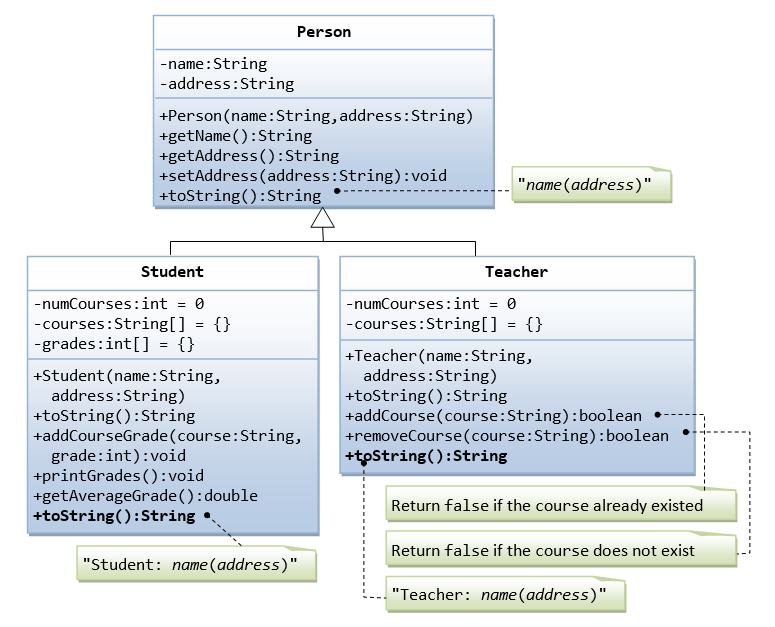

In [ ]:
from IPython.display import Image
Image('OOP_PersonStudnetTeacher.png')

In [ ]:
try:
    stream = open("OOP_PersonStudnetTeacher.png", "rb")
    image = bytearray(stream.read())
    stream.close()
except IOError:
    print("failed")
else:
    print("success")

success


## Library modules (os, datetime, time, and calendar.)


In [ ]:
import os
print(os.uname())

posix.uname_result(sysname='Linux', nodename='65bd11214013', release='5.4.104+', version='#1 SMP Sat Jun 5 09:50:34 PDT 2021', machine='x86_64')


In [ ]:
import os
print(os.name)

posix


In [ ]:
import os
os.mkdir("my_first_directory")
print(os.listdir())

['.config', 'my_first_directory', 'fteks.txt', 'OOP_PersonStudnetTeacher.png', 'Daftar_Nilai_Random.txt', 'file.bin', 'teks.txt', 'sample_data']


In [ ]:
import os

os.makedirs("my_first_directory/my_second_directory")
os.chdir("my_first_directory")
print(os.listdir())

['my_second_directory']


In [ ]:
!pwd

/content/my_first_directory


In [ ]:
# Where am I now?
import os

os.makedirs("my_first_directory/my_second_directory")
os.chdir("my_first_directory")
print(os.getcwd())
os.chdir("my_second_directory")
print(os.getcwd())

/content/my_first_directory/my_first_directory
/content/my_first_directory/my_first_directory/my_second_directory


In [ ]:
import os

os.mkdir("my_first_directory")
print(os.listdir())
os.rmdir("my_first_directory")
print(os.listdir())

['my_first_directory']
[]


In [ ]:
from datetime import date

today = date.today()

print("Today:", today)
print("Year:", today.year)
print("Month:", today.month)
print("Day:", today.day)

Today: 2021-08-01
Year: 2021
Month: 8
Day: 1


In [ ]:
from datetime import date
import time

timestamp = time.time()
print("Timestamp:", timestamp)

d = date.fromtimestamp(timestamp)
print("Date:", d)

Timestamp: 1627833115.8450341
Date: 2021-08-01


In [ ]:
from datetime import date

d = date.fromisoformat('2019-11-04')
print(d)

2019-11-04


In [ ]:
from datetime import date

d = date(1991, 2, 5)
print(d)

d = d.replace(year=1992, month=1, day=16)
print(d)

1991-02-05
1992-01-16


In [ ]:
from datetime import date

d = date(2019, 11, 4)
print(d.weekday())

0


In [ ]:
from datetime import time

t = time(14, 53, 20, 1)

print("Time:", t)
print("Hour:", t.hour)
print("Minute:", t.minute)
print("Second:", t.second)
print("Microsecond:", t.microsecond)

Time: 14:53:20.000001
Hour: 14
Minute: 53
Second: 20
Microsecond: 1


In [ ]:
import time

class Student:
    def take_nap(self, seconds):
        print("I'm very tired. I have to take a nap. See you later.")
        time.sleep(seconds)
        print("I slept well! I feel great!")

student = Student()
student.take_nap(5)

I'm very tired. I have to take a nap. See you later.
I slept well! I feel great!


In [ ]:
import time

timestamp = 1572879180
print(time.ctime(timestamp))

Mon Nov  4 14:53:00 2019


In [ ]:
import time

timestamp = 1572879180
print(time.gmtime(timestamp))
print(time.localtime(timestamp))

time.struct_time(tm_year=2019, tm_mon=11, tm_mday=4, tm_hour=14, tm_min=53, tm_sec=0, tm_wday=0, tm_yday=308, tm_isdst=0)
time.struct_time(tm_year=2019, tm_mon=11, tm_mday=4, tm_hour=14, tm_min=53, tm_sec=0, tm_wday=0, tm_yday=308, tm_isdst=0)


In [ ]:
import time

timestamp = 0
st = time.gmtime(timestamp)

print(time.asctime(st))
print(time.mktime((2019, 11, 4, 14, 53, 0, 0, 308, 0)))

Thu Jan  1 00:00:00 1970
1572879180.0


In [ ]:
from datetime import datetime

dt = datetime(2019, 11, 4, 14, 53)

print("Datetime:", dt)
print("Date:", dt.date())
print("Time:", dt.time())

Datetime: 2019-11-04 14:53:00
Date: 2019-11-04
Time: 14:53:00


In [ ]:
from datetime import datetime

print("today:", datetime.today())
print("now:", datetime.now())
print("utcnow:", datetime.utcnow())

today: 2021-08-01 15:56:32.760618
now: 2021-08-01 15:56:32.763130
utcnow: 2021-08-01 15:56:32.763772


In [ ]:
from datetime import datetime

dt = datetime(2020, 10, 4, 14, 55)
print("Timestamp:", dt.timestamp())

Timestamp: 1601823300.0


In [ ]:
from datetime import date

d = date(2020, 1, 4)
print(d.strftime('%Y/%m/%d'))

2020/01/04


In [ ]:
from datetime import time
from datetime import datetime

t = time(14, 53)
print(t.strftime("%H:%M:%S"))

dt = datetime(2020, 11, 4, 14, 53)
print(dt.strftime("%y/%B/%d %H:%M:%S"))

14:53:00
20/November/04 14:53:00


In [ ]:
import time

timestamp = 1572879180
st = time.gmtime(timestamp)

print(time.strftime("%Y/%m/%d %H:%M:%S", st))
print(time.strftime("%Y/%m/%d %H:%M:%S"))

2019/11/04 14:53:00
2021/08/01 15:58:06


In [ ]:
from datetime import datetime
print(datetime.strptime("2019/11/04 14:53:00", "%Y/%m/%d %H:%M:%S"))

2019-11-04 14:53:00


In [ ]:
from datetime import date
from datetime import datetime

d1 = date(2020, 11, 4)
d2 = date(2019, 11, 4)

print(d1 - d2)

dt1 = datetime(2020, 11, 4, 0, 0, 0)
dt2 = datetime(2019, 11, 4, 14, 53, 0)

print(dt1 - dt2)

366 days, 0:00:00
365 days, 9:07:00


In [ ]:
from datetime import timedelta

delta = timedelta(weeks=2, days=2, hours=3)
print(delta)

16 days, 3:00:00


In [ ]:
from datetime import timedelta
from datetime import date
from datetime import datetime

delta = timedelta(weeks=2, days=2, hours=2)
print(delta)

delta2 = delta * 2
print(delta2)

d = date(2019, 10, 4) + delta2
print(d)

dt = datetime(2019, 10, 4, 14, 53) + delta2
print(dt)

16 days, 2:00:00
32 days, 4:00:00
2019-11-05
2019-11-05 18:53:00


In [ ]:
from datetime import time

t = time(14, 39)
print(t.strftime("%H:%M:%S"))

14:39:00


In [ ]:
from datetime import datetime

dt1 = datetime(2020, 9, 29, 14, 41, 0)
dt2 = datetime(2020, 9, 28, 14, 41, 0)

print(dt1 - dt2)

1 day, 0:00:00


In [ ]:
import calendar
print(calendar.calendar(2021))

                                  2021

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
             1  2  3       1  2  3  4  5  6  7       1  2  3  4  5  6  7
 4  5  6  7  8  9 10       8  9 10 11 12 13 14       8  9 10 11 12 13 14
11 12 13 14 15 16 17      15 16 17 18 19 20 21      15 16 17 18 19 20 21
18 19 20 21 22 23 24      22 23 24 25 26 27 28      22 23 24 25 26 27 28
25 26 27 28 29 30 31                                29 30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
          1  2  3  4                      1  2          1  2  3  4  5  6
 5  6  7  8  9 10 11       3  4  5  6  7  8  9       7  8  9 10 11 12 13
12 13 14 15 16 17 18      10 11 12 13 14 15 16      14 15 16 17 18 19 20
19 20 21 22 23 24 25      17 18 19 20 21 22 23      21 22 23 24 25 26 27
26 27 28 29 30            24 25 26 27 

In [ ]:
import calendar
print(calendar.month(2021, 8))

    August 2021
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30 31



In [ ]:
import calendar

calendar.setfirstweekday(calendar.SUNDAY)
calendar.prmonth(2021, 8)

    August 2021
Su Mo Tu We Th Fr Sa
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30 31


In [ ]:
import calendar
print(calendar.weekday(2021, 8,1)) # Agustus tgl 1 hari ke-6 (Minggu)

6


In [ ]:
import calendar
print(calendar.weekheader(2))

Su Mo Tu We Th Fr Sa


In [ ]:
import calendar

print(calendar.isleap(2021))
print(calendar.leapdays(2010, 2025))  # Up to but not including 2025.

False
4


In [ ]:
import calendar  

c = calendar.Calendar(calendar.SUNDAY)

for weekday in c.iterweekdays():
    print(weekday, end=" ")

6 0 1 2 3 4 5 

In [ ]:
import calendar  

c = calendar.Calendar()

for date in c.itermonthdates(2019, 11):
    print(date, end=" ")

2019-10-28 2019-10-29 2019-10-30 2019-10-31 2019-11-01 2019-11-02 2019-11-03 2019-11-04 2019-11-05 2019-11-06 2019-11-07 2019-11-08 2019-11-09 2019-11-10 2019-11-11 2019-11-12 2019-11-13 2019-11-14 2019-11-15 2019-11-16 2019-11-17 2019-11-18 2019-11-19 2019-11-20 2019-11-21 2019-11-22 2019-11-23 2019-11-24 2019-11-25 2019-11-26 2019-11-27 2019-11-28 2019-11-29 2019-11-30 2019-12-01 

In [ ]:
import calendar  

c = calendar.Calendar()

for iter in c.itermonthdays(2019, 11):
    print(iter, end=" ")

0 0 0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 0 

In [ ]:
import calendar  

c = calendar.Calendar()

for data in c.monthdays2calendar(2020, 12):
    print(data)

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]
[(7, 0), (8, 1), (9, 2), (10, 3), (11, 4), (12, 5), (13, 6)]
[(14, 0), (15, 1), (16, 2), (17, 3), (18, 4), (19, 5), (20, 6)]
[(21, 0), (22, 1), (23, 2), (24, 3), (25, 4), (26, 5), (27, 6)]
[(28, 0), (29, 1), (30, 2), (31, 3), (0, 4), (0, 5), (0, 6)]


# Processing Files

In [ ]:
stream = open("teks.txt", "rt", encoding = "utf-8") # opening tzop.txt in read mode, returning it as a file object
print(stream.read()) # printing the content of the file

Dari permasalahan tersebut kami membuat framework Big Data App untuk membuat pengguna akhir (end user), 
khususnya pengembang untuk memudahkan dalam membangun suatu aplikasi Big Data,
yaitu dengan mengintegrasikan frontend menggunakan Web App dari framework Django dan Mobile App Native


In [ ]:
from os import strerror

try:
    cnt = 0
    s = open('teks.txt', "rt")
    ch = s.read(1)
    while ch != '':
        print(ch, end='')
        cnt += 1
        ch = s.read(1)
    s.close()
    print("\n\nCharacters in file:", cnt)
except IOError as e:
    print("I/O error occurred: ", strerr(e.errno))

Dari permasalahan tersebut kami membuat framework Big Data App untuk membuat pengguna akhir (end user), 
khususnya pengembang untuk memudahkan dalam membangun suatu aplikasi Big Data,
yaitu dengan mengintegrasikan frontend menggunakan Web App dari framework Django dan Mobile App Native

Characters in file: 286


In [ ]:
from os import strerror

try:
    ccnt = lcnt = 0
    s = open('teks.txt', 'rt')
    line = s.readline()
    while line != '':
        lcnt += 1
        for ch in line:
            print(ch, end='')
            ccnt += 1
        line = s.readline()
    s.close()
    print("\n\nCharacters in file:", ccnt)
    print("Lines in file:     ", lcnt)
except IOError as e:
    print("I/O error occurred:", strerr(e.errno))

Dari permasalahan tersebut kami membuat framework Big Data App untuk membuat pengguna akhir (end user), 
khususnya pengembang untuk memudahkan dalam membangun suatu aplikasi Big Data,
yaitu dengan mengintegrasikan frontend menggunakan Web App dari framework Django dan Mobile App Native

Characters in file: 286
Lines in file:      3


In [ ]:
from os import strerror

try:
    ccnt = lcnt = 0
    s = open('teks.txt', 'rt')
    lines = s.readlines(20)
    while len(lines) != 0:
        for line in lines:
            lcnt += 1
            for ch in line:
                print(ch, end='')
                ccnt += 1
        lines = s.readlines(10)
    s.close()
    print("\n\nCharacters in file:", ccnt)
    print("Lines in file:     ", lcnt)
except IOError as e:
    print("I/O error occurred:", strerr(e.errno))

Dari permasalahan tersebut kami membuat framework Big Data App untuk membuat pengguna akhir (end user), 
khususnya pengembang untuk memudahkan dalam membangun suatu aplikasi Big Data,
yaitu dengan mengintegrasikan frontend menggunakan Web App dari framework Django dan Mobile App Native

Characters in file: 286
Lines in file:      3


Semoga Sukses. Aamiin. :D
![]( https://docs.google.com/uc?export=download&id=1vJNmuncRehLc3WCZkFYCU6rRMVTy-w0k)